In [1]:
from src import PickleManager
from src import Resolution
from src import ipynb_display_image

pm = PickleManager(directory="./pickle_data", verbose=True)

# Loading the scene and rendering with the blinn-phong tracer at different resolutions

Now we can load the scene and render a preview at a chosen resolution (144p here for speed)

In [2]:
scene = pm.load_scene("spheres")

Loaded object from pickle_data/scene_spheres.pkl
Scene(world=<src.geometry.world.World object at 0x11182d790>, camera=Camera(fov=60, resolution=<Resolution.R360p: (640, 360)>, origin=Vertex(x=0, y=1, z=3), direction=Vec3(x=0.0, y=-0.04993761694389223, z=-0.9987523388778445), up_hint=Vector(x=0, y=1, z=0)), lights=[[AmbientLight(position=Vertex(x=0, y=0, z=0), intensity=0.0, falloff=1.0, type=<LightType.AMBIENT: 'ambient'>), PointLight(position=Vec3(x=6, y=6, z=-1), intensity=2000.0, falloff=0.1, type=<LightType.POINT: 'point'>)], PointLight(position=Vec3(x=6, y=6, z=-1), intensity=2000.0, falloff=0.1, type=<LightType.POINT: 'point'>)])


Rendering:   0%|          | 0/360 [00:00<?, ?row/s]

Phong render saved to images/phong.png
Rendered image saved to images/phong.png


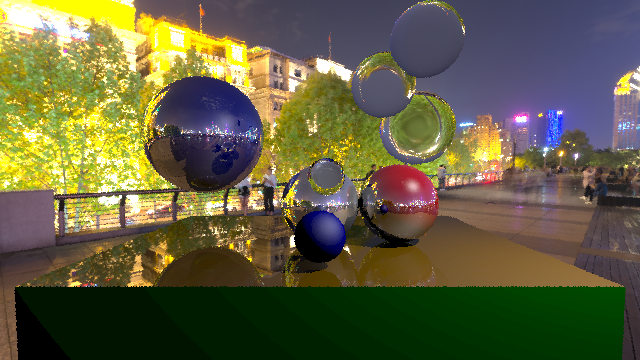

Rendering:   0%|          | 0/720 [00:00<?, ?row/s]

In [ ]:
scene.set_camera_resolution(Resolution.R360p)
png = scene.render_phong(
    samples_per_pixel=1,
    max_depth=5,
    image_png_path="./images/phong.png"
)

print(f"Rendered image saved to {png}")

ipynb_display_image(png)

scene.set_camera_resolution(Resolution.HD)

png_hd = scene.render_phong(
    samples_per_pixel=6,
    max_depth=8,
    image_png_path="./images/phong_hd.png"
)